In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [84]:
img = cv2.imread('1.jpg', 0)
img = cv2.resize(img, dsize=(512, 512), interpolation=cv2.INTER_CUBIC)

In [85]:
def crop_image(img, edge):
    i = 0
    j = 0
    cropped = []
    step_x = img.shape[0]//edge
    step_y = img.shape[1]//edge
    while i < img.shape[0]:
        while j < img.shape[1]:
            if j+step_y <= img.shape[1] and i+step_x <= img.shape[0]:
                cropped.append(img[i:i+step_x, j:j+step_y])
            elif j+step_y > img.shape[1] and i+step_x < img.shape[0]:
                cropped.append(img[i:i+step_x, j:])
            elif j+step_y <= img.shape[1] and i+step_x > img.shape[0]:
                cropped.append(img[i:, j:j+step_y])
            else:
                cropped.append(img[i:, j:])
            j += step_y
        j = 0
        i+=step_x
    return cropped

            

In [86]:
cropped_img = crop_image(img, 6)

In [87]:
img_puzzle = np.zeros((img.shape[0], img.shape[1]))
for k in range(len(cropped_img)):
    w, h = cropped_img[k].shape[::-1] 
    img_copy = img.copy()

    res = cv2.matchTemplate(img_copy,cropped_img[k],cv2.TM_CCOEFF_NORMED) 

    threshold = 0.995

    loc = np.where( res >= threshold)
    x = loc[0][0]
    y = loc[1][0]
    
    img_puzzle[x:x+h, y:y+w] = cropped_img[k]

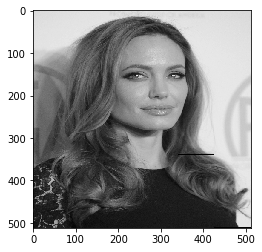

In [88]:
plt.imshow(img_puzzle, cmap='gray')